<a href="https://colab.research.google.com/github/boyu571/kpc_lecture_notes/blob/master/(%EC%9E%90%EB%8F%99%ED%99%94)Block_%EC%84%A4%EA%B3%84_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리, 함수 import하기
import numpy as np
import pandas as pd
from itertools import permutations
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] = 'NanumGothic'

Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
Sudo가 이 컴퓨터에서 사용하지 않도록 설정되어 있습니다. 사용하도록 설정하려면 으로 이동하세요. ]8;;ms-settings:developers\Developer Settings page]8;;\ 설정 앱의
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
activity_segment = pd.read_excel('project_fromto.xlsx', sheet_name = 'Activity작업분할표')
activity_segment['작업'] = activity_segment['작업'].apply(lambda x : x.replace(' ', ''))
activity_segment

,작업,Activity그룹1,Activity그룹2,Activity그룹3
0,입하,Activity 1,Activity 1,Activity 1
1,하차,Activity 1,Activity 1,Activity 1
2,검수/검품,Activity 1,Activity 1,Activity 2
3,입고/적치,Activity 2,Activity 1,Activity 2
4,재고조사,Activity 2,Activity 2,Activity 2
5,주문마감,Activity 2,Activity 3,Activity 3
6,피킹작업,Activity 3,Activity 4,Activity 4
7,유통기공,Activity 4,Activity 4,Activity 4
8,출고확정,Activity 5,Activity 5,Activity 4
9,상차출하,Activity 5,Activity 5,Activity 5


In [4]:
plan_name = 'Activity그룹1'

In [5]:
activity_segment_map = {row['작업']:row[plan_name][-1] for _, row in activity_segment[['작업', plan_name]].iterrows()}
activity_segment_map

{'입하': '1',
 '하차': '1',
 '검수/검품': '1',
 '입고/적치': '2',
 '재고조사': '2',
 '주문마감': '2',
 '피킹작업': '3',
 '유통기공': '4',
 '출고확정': '5',
 '상차출하': '5'}

In [6]:
activities = sorted(list(set(activity_segment_map.values())))
activities

['1', '2', '3', '4', '5']

In [7]:
activity_load = pd.read_excel('project_fromto.xlsx', sheet_name = 'Activity작업수량', index_col = 'from_to')
activity_load.columns = activity_segment_map.keys()
activity_load.index = activity_segment_map.keys()
activity_load = activity_load.replace({np.nan: None, '-' : 0})
activity_load = activity_load.fillna(0)
activity_load = activity_load.astype(int)
activity_load

,입하,하차,검수/검품,입고/적치,재고조사,주문마감,피킹작업,유통기공,출고확정,상차출하
입하,0,100,30,40,0,0,30,0,0,0
하차,10,0,40,50,0,0,0,0,0,0
검수/검품,0,0,0,30,0,0,40,0,0,0
입고/적치,0,0,20,0,20,0,80,0,0,15
재고조사,0,0,0,10,0,0,20,0,0,10
주문마감,0,0,0,0,0,0,15,30,0,40
피킹작업,0,0,0,0,0,10,0,10,0,60
유통기공,0,0,0,0,0,30,10,0,40,60
출고확정,0,0,0,0,0,0,0,20,0,10
상차출하,0,0,0,0,20,0,10,10,10,0


In [8]:
activity_load_map = activity_load.copy()
activity_load_map.columns = [activity_segment_map[col] for col in activity_load_map.columns]
activity_load_map.index = [activity_segment_map[i] for i in activity_load_map.index]
activity_load_map

,1,1,1,2,2,2,3,4,5,5
1,0,100,30,40,0,0,30,0,0,0
1,10,0,40,50,0,0,0,0,0,0
1,0,0,0,30,0,0,40,0,0,0
2,0,0,20,0,20,0,80,0,0,15
2,0,0,0,10,0,0,20,0,0,10
2,0,0,0,0,0,0,15,30,0,40
3,0,0,0,0,0,10,0,10,0,60
4,0,0,0,0,0,30,10,0,40,60
5,0,0,0,0,0,0,0,20,0,10
5,0,0,0,0,20,0,10,10,10,0


In [9]:
workload_data = pd.DataFrame(columns = ['From'] + activities)
workload_data

,From,1,2,3,4,5


In [10]:
i=0
for activity_from in activities:
    workload_data.loc[i, 'From'] = activity_from
    for activity_to in activities:
        workload_data.loc[i, activity_to] = activity_load_map[activity_load_map.index==activity_from][activity_to].sum().sum()
    i+=1

In [11]:
workload_data = workload_data.set_index('From')
workload_data

,1,2,3,4,5
From,,,,,
1,180,120,70,0,0
2,20,30,115,30,65
3,0,10,0,10,60
4,0,30,10,0,100
5,0,20,10,30,20


In [12]:
activity_distance = pd.read_excel('project_fromto.xlsx', sheet_name = 'Location거리', index_col = 'from_to')
activity_distance.replace('-', 0, inplace=True)
activity_distance

,A,B,C,D,E
from_to,,,,,
A,0,30,20,50,20
B,30,0,40,30,15
C,20,40,0,40,30
D,50,30,40,0,60
E,20,15,30,60,0


In [13]:
def sum_product(list1, list2):
    return sum([list1[i][j] * list2[i][j] for i in range(len(list1)) for j in range(len(list1[0]))])

In [14]:
workload_data_dict = workload_data.to_dict()
workload_data_dict

{'1': {'1': 180, '2': 20, '3': 0, '4': 0, '5': 0},
 '2': {'1': 120, '2': 30, '3': 10, '4': 30, '5': 20},
 '3': {'1': 70, '2': 115, '3': 0, '4': 10, '5': 10},
 '4': {'1': 0, '2': 30, '3': 10, '4': 0, '5': 30},
 '5': {'1': 0, '2': 65, '3': 60, '4': 100, '5': 20}}

In [15]:
activity_distance_dict = activity_distance.to_dict()
activity_distance_dict

{'A': {'A': 0, 'B': 30, 'C': 20, 'D': 50, 'E': 20},
 'B': {'A': 30, 'B': 0, 'C': 40, 'D': 30, 'E': 15},
 'C': {'A': 20, 'B': 40, 'C': 0, 'D': 40, 'E': 30},
 'D': {'A': 50, 'B': 30, 'C': 40, 'D': 0, 'E': 60},
 'E': {'A': 20, 'B': 15, 'C': 30, 'D': 60, 'E': 0}}

In [16]:
#이 함수는 및 사전 permutations에 있는 키의 가능한 모든 순열을 생성하는 데 사용됩니다 .distance_dataworkload_data
distance_permutations = permutations(activity_distance_dict.keys())
workload_permutations = permutations(workload_data_dict.keys())

#중첩된 루프는 거리 및 워크로드 순열의 각 조합을 반복하는 데 사용됩니다.
#각 조합에 대해 해당 거리 및 작업량 값이 검색되어 및 에 distance_list각각 저장됩니다 workload_list.
#sum_product거리 및 작업 부하 목록을 기반으로 결과를 계산하기 위해 함수가 호출됩니다 .
#결과가 results목록에 추가되고 조합이 목록에 저장됩니다 permutations_data.

results = []
permutations_data = []

for distance_perm in distance_permutations:
    for workload_perm in workload_permutations:
        distance_list = [[activity_distance_dict[from_loc][to_loc] for to_loc in distance_perm] for from_loc in distance_perm]
        workload_list = [[workload_data_dict[from_loc][to_loc] for to_loc in workload_perm] for from_loc in workload_perm]
        result = sum_product(distance_list, workload_list)
        results.append(result)
        permutations_data.append((distance_perm, workload_perm))

#DataFrame은 열 이름을 키로 사용하고 해당 목록을 값으로 사용하는 사전을 사용하여 생성됩니다.
#목록 내포는 거리 및 워크로드 순열을 "거리 순열"에 대한 문자열 형식으로 결합하는 데 사용됩니다.


df = pd.DataFrame({'Distance Permutation': [f'{", ".join(perm[1])}' for perm in permutations_data],
                   'Result': results})
df
# df.loc[df["Result"].idxmin()]

,Distance Permutation,Result
0,"1, 2, 3, 4, 5",24375
1,"1, 2, 3, 5, 4",25250
2,"1, 2, 4, 3, 5",24025
3,"1, 2, 4, 5, 3",22425
4,"1, 2, 5, 3, 4",23650
...,...,...
115,"5, 4, 1, 3, 2",25100
116,"5, 4, 2, 1, 3",23250
117,"5, 4, 2, 3, 1",25500
118,"5, 4, 3, 1, 2",23650


In [17]:
df.loc[df["Result"].idxmin()]['Distance Permutation']

'2, 5, 1, 4, 3'

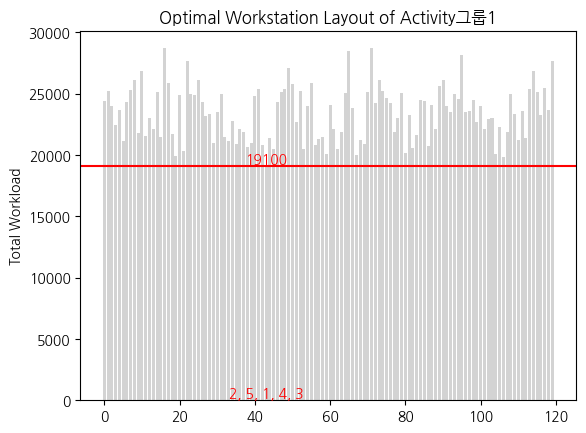

In [21]:
plt.bar(range(len(df)), df['Result'], color='lightgray')
plt.axhline(y = df["Result"].min(), color = 'r', linestyle = '-') 
plt.text(df["Result"].idxmin(), df["Result"].min(), df["Result"].min(), ha='center', va='bottom', color='red')
plt.text(df["Result"].idxmin(), 0, df.loc[df["Result"].idxmin()]['Distance Permutation'], ha='center', va='bottom', color='red')
plt.title(f'Optimal Workstation Layout of {plan_name}')
plt.ylabel('Total Workload')
plt.show()